In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [37]:
# 파라미터 
learning_rate=0.01
training_epochs=1
batch_size=256
display_step=1
example_show=10 

In [4]:
#네트워크 구조 노드 정의
n_hidden1=300
n_hidden2=150
n_input=784

In [5]:
x=tf.placeholder(tf.float32,[None,n_input])

In [29]:
# 오토 인코더 빌드

def build_autoencoder(x):
    # 인코딩 784->300
    w1=tf.Variable(tf.random_normal([n_input,n_hidden1]))
    b1=tf.Variable(tf.random_normal([n_hidden1]))
    L1=tf.nn.sigmoid(tf.matmul(x,w1)+b1)
    #인코딩 300-> 150
    w2=tf.Variable(tf.random_normal([n_hidden1,n_hidden2]))
    b2=tf.Variable(tf.random_normal([n_hidden2]))
    L2=tf.nn.sigmoid(tf.matmul(L1,w2)+b2)
    
    # 디코딩150->300
    w3=tf.Variable(tf.random_normal([n_hidden2,n_hidden1]))
    b3=tf.Variable(tf.random_normal([n_hidden1]))
    L3=tf.nn.sigmoid(tf.matmul(L2,w3)+b3)
    
    w4=tf.Variable(tf.random_normal([n_hidden1,n_input]))
    b4=tf.Variable(tf.random_normal([n_input]))
    reconstructed_x=tf.nn.sigmoid(tf.matmul(L3,w4)+b4)
    
    return reconstructed_x, L1


In [30]:
predicted_y,L1=build_autoencoder(x)
y_true=x  # 타켓 데이터는 인풋과 같다. 

In [20]:
# loss,optimizer
loss=tf.reduce_mean(tf.pow(y_true-predicted_y,2))
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(loss)


반복횟수(epoch): 0001 손실함수(loss): 0.215542614
최적화 완료


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


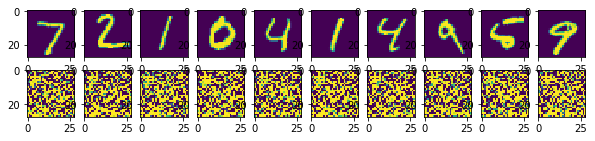

In [45]:
# 그래프 실행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch=int(mnist.train.num_examples/batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,c=sess.run([optimizer,loss],feed_dict={x:batch_xs})
            
        if epoch % display_step ==0:
                print("반복횟수(epoch):", '%04d'% (epoch+1),
                     "손실함수(loss):", "{:.9f}".format(c))
                
                
    print("최적화 완료")
    
    
    reconstucted_result=sess.run(predicted_y,feed_dict={x:mnist.test.images[:example_show]})
    # 원본이미지와 재구성한 이미지 비교
    f,a=plt.subplots(2,10,figsize=(10,2))
    for i in range(example_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(reconstucted_result[i],(28,28)))
                       
    f.show()
    plt.draw()
#     plt.waitforbuttonpress()

In [46]:
# 그래프 실행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch=int(mnist.train.num_examples/batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,c=sess.run([optimizer,loss],feed_dict={x:batch_xs})
            
        if epoch % display_step ==0:
                print("반복횟수(epoch):", '%04d'% (epoch+1),
                     "손실함수(loss):", "{:.9f}".format(c))
                
                
    print("최적화 완료")
    
    
    pre_y,h1=sess.run([predicted_y,L1],feed_dict={x:mnist.test.images[:example_show]})
#     image=np.reshape
#     print(len(L1[1]))
    # 원본이미지와 재구성한 이미지 비교
#     f,a=plt.subplots(2,10,figsize=(10,2))
#     for i in range(example_show):
        
#         a[1][i].imshow(np.reshape(L1[i],(20,15)))
                       
#     f.show()
#     plt.draw()
#     plt.waitforbuttonpress()

반복횟수(epoch): 0001 손실함수(loss): 0.210297629
최적화 완료


TypeError: Fetch argument array([[6.8167555e-01, 2.7794761e-06, 9.9999797e-01, ..., 9.7999978e-01,
        2.4149866e-01, 3.7647601e-02],
       [2.4297376e-01, 1.4731621e-03, 9.9999952e-01, ..., 9.8862118e-01,
        9.1006553e-01, 4.9978483e-04],
       [5.1026940e-01, 2.8135243e-04, 9.9999964e-01, ..., 4.0995210e-01,
        4.3574159e-06, 9.2099206e-08],
       ...,
       [5.7134837e-02, 7.3175435e-04, 9.9979538e-01, ..., 9.8607999e-01,
        3.6669324e-05, 6.9825343e-05],
       [5.3647745e-02, 1.3949708e-03, 9.9997962e-01, ..., 4.3601438e-01,
        6.3992562e-03, 4.0486033e-04],
       [3.9722696e-03, 1.0702233e-05, 9.9999988e-01, ..., 9.9985445e-01,
        6.1708420e-07, 1.6016153e-03]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)